# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# [Dependencias y resultados previos](./03-segmentacion.ipynb)

## Dependencias

In [4]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from skimage import io, color, img_as_float, img_as_ubyte, filters

import cv2

## Resultados

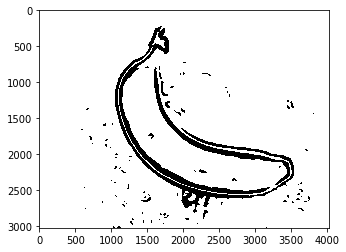

In [5]:
img = io.imread('./imgs/examples/banana_example.jpg')
banana_float = img_as_float(img)

banana = color.rgb2gray(banana_float)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bg1 = filters.gaussian(banana, sigma=20)
bc1 = filters.sobel(bg1)

th = filters.threshold_otsu(bc1)
bf = bc1 < th

fig, ax = plt.subplots()
ax.imshow(bf)

In [11]:
gray = cv2.resize(gray, (tuple((100, 100))))
print(gray.shape)

(100, 100)


---
# Extracción de características
---

La extracción de características de la imágen filtrada y segmentada es el último paso, previo a los algoritmos de clasificación.

La extracción consiste en obtener valores numéricos característicos de la imagen que serán la entrada a los algoritmos _K-means_ y _K-nn_.

## Histograma de Gradientes Orientados (HOG)

Se utiliza el algoritmo **HOG** porque la documentación indica que es muy adecuada y popular para reconocimiento de objetos.

In [9]:
from skimage.feature import hog

def m_hog(image):
    feature = hog(image).ravel()
    return feature

/usr/lib/python3.7/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


float64 (15288912,)


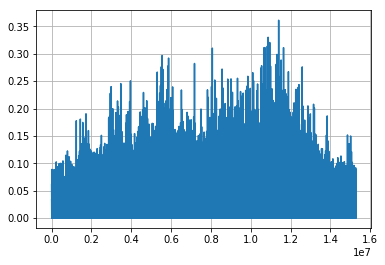

In [36]:
f_hog = m_hog(banana)
#print(f_hog)
print(f_hog.dtype, f_hog.shape)
plt.plot(f_hog)
plt.grid(True)

## Análisis de Componente Principal (PCA)

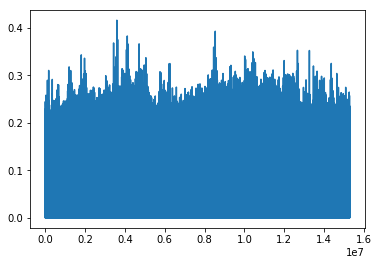

In [21]:
#from sklearn.decomposition import PCA

plt.plot(features)
#pca = PCA(n_components=2, svd_solver='full')
#pca.fit(hog_img)
#pf = pca.transform(hog_img)

In [32]:
print(pf)
print(pf.dtype)
print(pf.shape)

[[-2.14037064e-02  1.61022538e-16]
 [ 2.14037064e-02 -1.61015762e-16]]
float64
(2, 2)


## Hu Moments

Extracción de características _Hu Moments_ mediante módulo _cv2_. Para la extracción recibe la imágen en escala de grises.

In [24]:
def hu_moments(image):
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

[ 3.64859400e-01  7.78207238e-03  8.83910708e-05  1.26886657e-04
 -7.84223262e-09 -6.63526514e-06  1.09120952e-08]
float64 (7,)


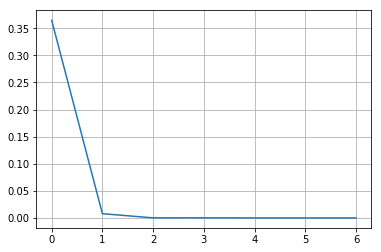

In [31]:
f_hm = hu_moments(banana)
print(f_hm)
print(f_hm.dtype, f_hm.shape)
plt.plot(f_hm)
plt.grid(True)

## Haralick Textures

Extracción de características _Haralick Texture_ mediante módulo _mahotas_. Para la extracción recibe la imagen en escala de grises.

In [7]:
import mahotas

def haralick(image):
    feature= mahotas.features.haralick(image).mean(axis=0)
    return feature

[ 1.10467481e-03  1.83641055e+01  9.87973869e-01  7.63518081e+02
  3.65590154e-01  1.93082095e+02  3.03570822e+03  7.76808993e+00
  1.05259614e+01  6.70576433e-04  2.94728834e+00 -4.45769013e-01
  9.98717863e-01]
float64 (13,)


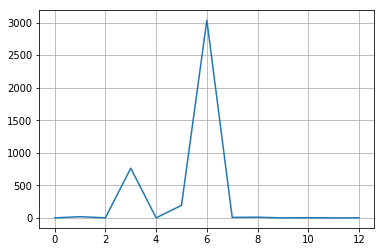

In [29]:
f_ht = haralick(gray)
print(f_ht)
print(f_ht.dtype, f_ht.shape)
plt.plot(f_ht)
plt.grid(True)

## Color Histogram

Extracción de características de histograma de color mediante módulo _cv2_. Para la extracción recibe la imagen a color original e internamente hace una conversión a formato HSV con _cv2_

In [33]:
def color_histogram(image, mask=None, bins=8):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins],
                        [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    feature = hist.flatten()
    return feature

float32 (512,)


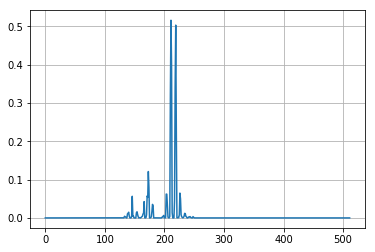

In [35]:
f_ch = color_histogram(img)
#print(f_ch)
print(f_ch.dtype, f_ch.shape)
plt.plot(f_ch)
plt.grid(True)

(100, 100)


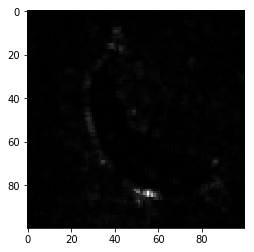

In [17]:
import cv2
arr = cv2.cornerMinEigenVal(gray, blockSize=3)
print(arr.shape)
plt.imshow(arr)